# Расчётно-графическая работа

## Блок 6. Эволюционные алгоритмы и генетическое программирование

### Тема: Эволюционный алгоритм для составления оптимального расписания занятий (Вариант 72)

## 1. Введение

Эволюционные алгоритмы относятся к классу стохастических оптимизационных методов, вдохновлённых принципами естественного отбора и эволюции в биологических системах. Их отличительной особенностью является работа с популяцией возможных решений и постепенное улучшение этих решений за счёт применения операторов селекции, скрещивания и мутации. Такой подход позволяет эффективно решать сложные многомерные задачи, для которых классические детерминированные методы либо малоприменимы, либо требуют чрезмерных вычислительных затрат.

Одной из типичных прикладных задач, хорошо подходящих для эволюционного подхода, является задача составления расписания занятий или работы. Данная задача относится к классу комбинаторных задач оптимизации: необходимо распределить множество занятий по ограниченному числу временных слотов с учётом ресурсов (преподавателей, групп, аудиторий), жёстких ограничений (отсутствие конфликтов) и мягких предпочтений (минимизация «окон», нежелательных слотов и т.п.). Количество возможных вариантов расписания растёт экспоненциально с увеличением числа занятий, что делает перебор всех вариантов практически невыполнимым.

В данной расчётно-графической работе рассматривается вариант 72 - "Расписание занятий/работы".

Целью работы является разработка и исследование эволюционного (генетического) алгоритма для составления оптимального расписания с минимизацией конфликтов и простоев при учёте заданных ограничений и предпочтений.

Для достижения поставленной цели в работе решаются следующие задачи:
- формализовать задачу составления расписания занятий/работы и определить систему ограничений и критериев качества решения;
- выбрать представление особи (хромосомы) в популяции, адекватное задаче, и разработать функцию приспособленности (fitness function), учитывающую конфликты и простои;
- реализовать генетические операторы селекции, скрещивания (кроссовера) и мутации для рассматриваемого представления решений;
- провести серию экспериментов по настройке параметров эволюционного алгоритма (размера популяции, числа поколений, вероятностей кроссовера и мутации, стратегии селекции);
- проанализировать динамику эволюции (изменение средней и максимальной приспособленности по поколениям) и качество полученных расписаний;
- сделать выводы о применимости эволюционного подхода для решения задачи составления расписания и возможных направлениях дальнейшего развития модели.

## 2. Описание задачи и постановки эксперимента

### 2.1. Формализация решаемой задачи

Рассматривается задача составления расписания занятий для двух учебных групп при ограниченном количестве временных слотов. Каждое занятие должно быть назначено на один временной слот, при этом необходимо учитывать следующие требования:

1. Отсутствие конфликтов ресурсов:
    - один преподаватель не может вести более одного занятия одновременно;
    - одна группа не может посещать более одного занятия одновременно.
  
2. Минимизация простоев («окон»):
    - количество временных промежутков между занятиями одной группы в течение дня должно быть минимальным.

3. Учёт предпочтений:
    - преподаватель `T1` нежелательно ведёт занятия на первой паре;
    - группе `G2` нежелательно иметь занятия на последней паре.

Задача относится к NP-трудным комбинаторным задачам оптимизации: количество возможных вариантов расписания растёт экспоненциально по мере увеличения числа занятий и временных слотов. Таким образом, использование полного перебора невозможно, что обосновывает выбор эвристических методов поиска.

### 2.2. Обоснование выбора эволюционного подхода

Эволюционный (генетический) алгоритм является универсальным инструментом решения сложных задач оптимизации, в которых невозможно эффективно применить детерминированные методы. Его основные преимущества для задачи составления расписания:

- работа с популяцией решений позволяет эффективно исследовать большое пространство комбинаций;
- операторы мутации и кроссовера обеспечивают механизм поиска в новых областях пространства решений;
- селекция позволяет усиливать хорошие структуры расписания и отбрасывать неэффективные варианты;
- возможность формировать решения, удовлетворяющие как жёстким, так и мягким ограничениям.

Поэтому генетический алгоритм является обоснованным и широко применяемым методом для задач распределения ресурсов и составления расписаний.

### 2.3. Описание представления особи (хромосомы)

В данной работе используется простое и универсальное представление расписания в виде вектора:

- пусть имеется `N` занятий, каждая из которых требует назначения временного слота;
- существует `M` доступных временных слотов (в работе: 20 слотов - 5 дней × 4 пары);
- хромосома - это массив длиной `N`, где каждый ген хранит номер слота:

![Представление хромосомы](images/formula_chromosome.png)

Таким образом:

- один ген соответствует одному занятию;
- значение гена определяет, в какой слот назначено это занятие;
- один и тот же слот может быть назначен разным занятиям, следовательно, это приводит к конфликтам, что отражается в штрафах функции приспособленности.

Подобное представление является компактным и удобно для модификации операторами генетического алгоритма.

### 2.4. Описание функции приспособленности

Функция приспособленности оценивает качество расписания на основе суммарного штрафа:

![Функция приспособленности](images/formula_fitness.png)

где штраф (penalty) вычисляется как сумма компонент:

1. Штрафы за конфликты преподавателей и групп
   - если преподаватель ведёт более одного занятия в одном слоте;
   - если группа имеет более одного занятия в одном слоте.
   Конфликты являются нарушением жёстких ограничений, поэтому имеют высокий вес.

2. Штрафы за «окна» (простои)
   - Для каждой группы внутри каждого дня подсчитываются промежутки между занятиями.
   - Каждое окно увеличивает штраф.

3. Штрафы за нарушение предпочтений 
   - занятия преподавателя T1 на первой паре;
   - занятия группы G2 на последней паре.

Функция fitness принимает наибольшее значение при минимальном штрафе, что соответствует лучшему расписанию.

### 2.5. Выбор и обоснование генетических операторов

В работе выбраны следующие стандартные операторы генетического алгоритма:

1. Селекция: турнирная селекция
    - Выбираются случайные подмножества индивидов, и в каждом турнире побеждает особь с наибольшим fitness.  
    - Метод стабилен, прост и хорошо подходит для задач расписания.

2. Кроссовер: одноточечный
    - Хромосомы родителей разделяются в случайной точке, и их части обмениваются.  
    - Такой оператор сохраняет блоки расписания и хорошо сочетается с линейным представлением хромосомы.

3. Мутация: точечная
    - С вероятностью `mutation_prob` ген получает новое случайное значение (другой слот).  
    - Мутация позволяет исследовать новые комбинации и предотвращает преждевременную сходимость популяции.

В совокупности данные операторы позволяют эффективно искать расписание, минимизируя конфликты и простои.

## 3. Процесс эволюции

Эволюционный алгоритм работает с популяцией возможных решений (вариантов расписаний), постепенно улучшая их качество за счёт операторов селекции, скрещивания и мутации. Для запуска алгоритма необходимо определить набор параметров, задающих поведение процесса эволюции.

### 3.1. Параметры генетического алгоритма

В данной работе используются следующие основные параметры:

1. Размер популяции (population_size)
    - Определяет количество особей (расписаний), обрабатываемых в каждом поколении.
    - Чем больше популяция, тем шире исследуемое пространство решений, но тем выше вычислительные затраты.

2. Число поколений (generations)
    - Количество итераций эволюции. Увеличение числа поколений позволяет достичь более качественного решения, но требует большего времени вычислений.

3. Вероятность кроссовера (скрещивания) (crossover_prob)
    - Определяет вероятность обмена фрагментами хромосом между двумя родителями.
    - Более высокая вероятность способствует интенсивному поиску новых комбинаций признаков.

4. Вероятность мутации (mutation_prob)
    - Вероятность изменения значения гена в хромосоме.
    - Мутация предотвращает преждевременную сходимость и обеспечивает разнообразие популяции.

5. Размер турнира (tournament_size)
    - Параметр для турнирной селекции. Чем больше размер турнира, тем сильнее селективное давление, что ускоряет сходимость, но увеличивает риск попадания в локальный минимум.

В базовом эксперименте используются параметры:

- `population_size = 50`
- `generations = 200`
- `crossover_prob = 0.8`
- `mutation_prob = 0.05`
- `tournament_size = 3`

Эти значения обеспечивают хорошее соотношение между качеством решений и вычислительными затратами.

Ниже приведён программный код, запускающий генетический алгоритм с указанными параметрами и сохраняющий статистику о динамике приспособленности.


Лучшая приспособленность: 1.0
Длина хромосомы (число занятий): 12


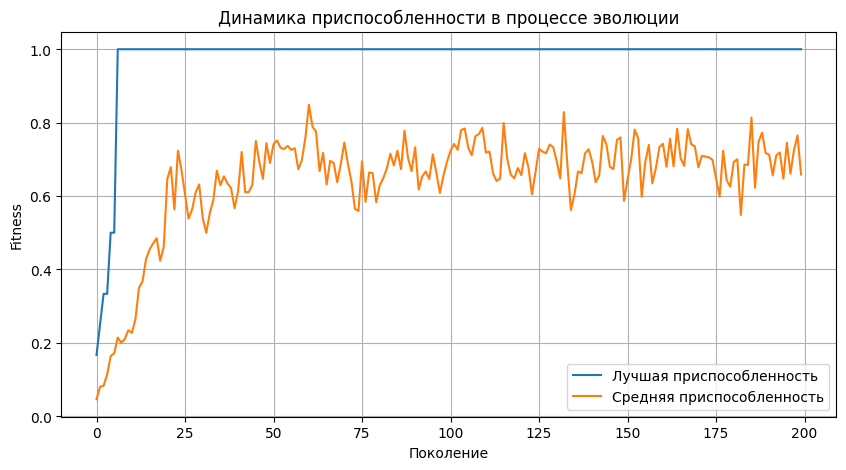

In [6]:
# Импорты, необходимые для работы алгоритма
import random
import matplotlib.pyplot as plt
import pandas as pd

from ga_schedule import (
    create_sample_lessons,
    GAConfig,
    run_ga,
    format_schedule,
    DAYS,
    SLOTS_PER_DAY,
)

# Фиксация зерна генератора для воспроизводимости
random.seed(42)

# Создание учебного набора занятий
lessons = create_sample_lessons()

# Конфигурация алгоритма (базовый эксперимент)
config = GAConfig(
    population_size=50,
    generations=200,
    crossover_prob=0.8,
    mutation_prob=0.05,
    tournament_size=3,
)

# Запуск генетического алгоритма
history = run_ga(lessons, config)

# Вывод ключевых метрик
print("Лучшая приспособленность:", history.best_fitness)
print("Длина хромосомы (число занятий):", len(history.best_chromosome))

# Графики динамики приспособленности
plt.figure(figsize=(10, 5))
plt.plot(history.best_fitness_per_gen, label="Лучшая приспособленность")
plt.plot(history.avg_fitness_per_gen, label="Средняя приспособленность")
plt.xlabel("Поколение")
plt.ylabel("Fitness")
plt.title("Динамика приспособленности в процессе эволюции")
plt.grid(True)
plt.legend()
plt.show()


На рисунке представлена динамика изменения приспособленности популяции в процессе эволюции при использовании базовых параметров алгоритма: размер популяции - 50 особей, число поколений - 200, вероятность кроссовера - 0.8, вероятность мутации - 0.05.

Анализ графиков показывает следующее:

1. Лучшая приспособленность (best fitness) очень быстро возрастает в начальных поколениях и достигает значения 1.0 примерно к 10-15 поколению. Это означает, что алгоритм нашёл расписание без конфликтов и с минимальными штрафами в относительно короткое время.

2. Средняя приспособленность (average fitness) растёт более плавно и после 40-50 поколений стабилизируется в диапазоне 0.6-0.8. Это говорит о том, что популяция в целом остаётся разнообразной, и не все особи достигают высокой приспособленности, что является положительным эффектом - сохраняется возможность поиска новых решений.

3. Разрыв между средней и лучшей приспособленностью отражает наличие сильного элитного решения, которое сохраняется в популяции благодаря механизму элитизма, при этом популяция не деградирует.

4. Быстрое достижение fitness = 1.0 показывает, что заданная конфигурация алгоритма подходит для рассматриваемой задачи. Алгоритм эффективно справляется с ограничениями расписания.

Таким образом, базовые параметры генетического алгоритма обеспечивают быструю сходимость и получение корректного расписания, что подтверждает применимость эволюционного подхода для задачи распределения занятий.

### 3.2. Настройка гиперпараметров

Настройка гиперпараметров генетического алгоритма является важным этапом, поскольку параметры эволюционного процесса напрямую влияют на:

- скорость сходимости;
- качество найденных решений;
- устойчивость алгоритма к локальным минимумам;
- вычислительные затраты.

В рамках данной работы исследуется влияние двух ключевых гиперпараметров:

1. Размер популяции (population_size)
   - Большая популяция обеспечивает более широкое покрытие пространства решений, но увеличивает вычислительную стоимость одной итерации.

2. Вероятность мутации (mutation_prob)
   - Низкая мутация может привести к преждевременной сходимости;
   - Слишком высокая - к деградации поиска (популяция становится слишком случайной).

Для анализа были проведены эксперименты с различными значениями гиперпараметров, чтобы определить их влияние на динамику приспособленности по поколениям.

В рамках настройки гиперпараметров были выбраны следующие экспериментальные сценарии:

- исследование влияния размера популяции при фиксированной вероятности мутации
  (значения `population_size`: 20, 50, 100 при `mutation_prob = 0.05`);

- исследование влияния вероятности мутации при фиксированном размере популяции
  (значения `mutation_prob`: 0.01, 0.05, 0.15 при `population_size = 50`).

Для каждого набора параметров генетический алгоритм запускался на 200 поколений, после чего сохранялась динамика лучшей приспособленности по поколениям.
Ниже приведён программный код, выполняющий данные эксперименты.


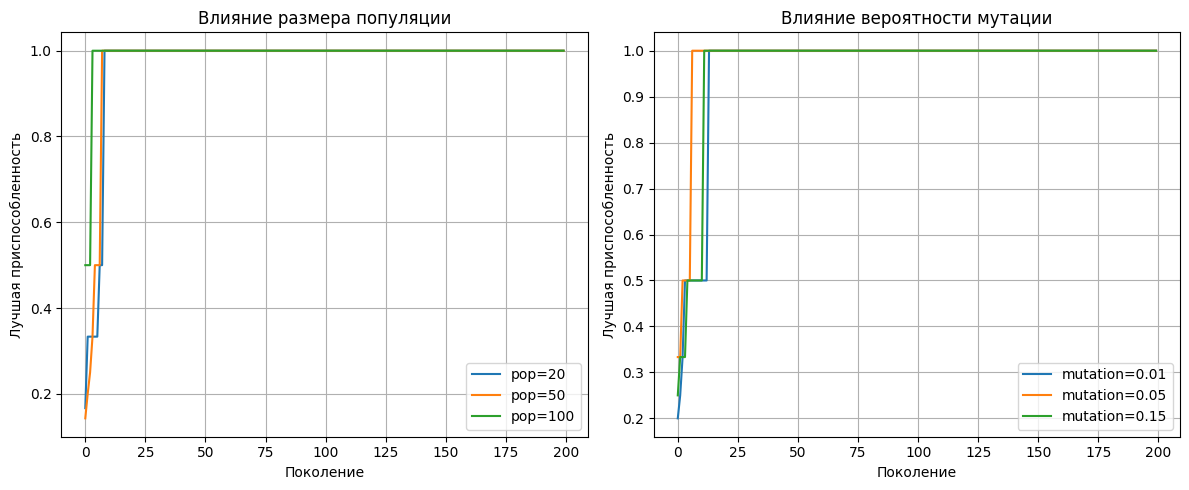

Эксперимент  Лучшая приспособленность  Поколение достижения  \
0         pop=20                       1.0                     8   
1         pop=50                       1.0                     7   
2        pop=100                       1.0                     3   
3  mutation=0.01                       1.0                    13   
4  mutation=0.05                       1.0                     6   
5  mutation=0.15                       1.0                    11   

   Средняя приспособленность в финале  
0                            0.759848  
1                            0.642123  
2                            0.657968  
3                            0.926407  
4                            0.682579  
5                            0.246680

In [10]:
# Эксперименты
def run_experiment(pop_size, mutation_prob):
    config = GAConfig(
        population_size=pop_size,
        generations=200,
        crossover_prob=0.8,
        mutation_prob=mutation_prob,
        tournament_size=3,
    )
    return run_ga(lessons, config)

# Эксперимент 1: влияние размера популяции
exp_pop_20 = run_experiment(20, 0.05)
exp_pop_50 = run_experiment(50, 0.05)
exp_pop_100 = run_experiment(100, 0.05)

# Эксперимент 2: влияние вероятности мутации
exp_mut_001 = run_experiment(50, 0.01)
exp_mut_005 = run_experiment(50, 0.05)
exp_mut_015 = run_experiment(50, 0.15)

# Графики
plt.figure(figsize=(12,5))

# Графики для размера популяции
plt.subplot(1, 2, 1)
plt.plot(exp_pop_20.best_fitness_per_gen, label="pop=20")
plt.plot(exp_pop_50.best_fitness_per_gen, label="pop=50")
plt.plot(exp_pop_100.best_fitness_per_gen, label="pop=100")
plt.title("Влияние размера популяции")
plt.xlabel("Поколение")
plt.ylabel("Лучшая приспособленность")
plt.grid(True)
plt.legend()

# Графики для вероятности мутации
plt.subplot(1, 2, 2)
plt.plot(exp_mut_001.best_fitness_per_gen, label="mutation=0.01")
plt.plot(exp_mut_005.best_fitness_per_gen, label="mutation=0.05")
plt.plot(exp_mut_015.best_fitness_per_gen, label="mutation=0.15")
plt.title("Влияние вероятности мутации")
plt.xlabel("Поколение")
plt.ylabel("Лучшая приспособленность")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Метрики
def extract_metrics(history):
    best = max(history.best_fitness_per_gen)
    best_gen = history.best_fitness_per_gen.index(best)
    avg_final = history.avg_fitness_per_gen[-1]
    return best, best_gen, avg_final

metrics = []

# Популяция
metrics.append(["pop=20", *extract_metrics(exp_pop_20)])
metrics.append(["pop=50", *extract_metrics(exp_pop_50)])
metrics.append(["pop=100", *extract_metrics(exp_pop_100)])

# Мутация
metrics.append(["mutation=0.01", *extract_metrics(exp_mut_001)])
metrics.append(["mutation=0.05", *extract_metrics(exp_mut_005)])
metrics.append(["mutation=0.15", *extract_metrics(exp_mut_015)])

df_metrics = pd.DataFrame(metrics, columns=[
    "Эксперимент",
    "Лучшая приспособленность",
    "Поколение достижения",
    "Средняя приспособленность в финале"
])

df_metrics


На основании проведённых экспериментов можно сделать следующие выводы о влиянии размера популяции и вероятности мутации на динамику эволюции генетического алгоритма.

#### 1. Влияние размера популяции

Графики показывают, что во всех трёх сценариях (`pop=20`, `pop=50`, `pop=100`) алгоритм достигает максимальной приспособленности 1.0, однако скорость сходимости различается:

- pop=100 демонстрирует самую быструю сходимость - максимум достигнут уже на 3-м поколении.
  Большая популяция обеспечивает лучшее покрытие пространства решений и быстрее находит оптимальные комбинации.

- pop=50 достигает максимума на 7-м поколении, обеспечивая хороший баланс между скоростью работы и качеством поиска.

- pop=20 сходится медленнее - максимум на 8-м поколении.
  При малом размере популяции снижается разнообразие, что замедляет поиск.

Средняя финальная приспособленность также выше при большем размере популяции, что подтверждает более стабильный эволюционный процесс.

Вывод: оптимальным значением для данной задачи является диапазон 50-100, где обеспечивается высокая скорость сходимости при приемлемых вычислительных затратах.

#### 2. Влияние вероятности мутации

Результаты для трёх сценариев (`mutation=0.01`, `mutation=0.05`, `mutation=0.15`) показывают:

- mutation=0.05 обеспечивает наиболее быструю сходимость - максимум на 6-м поколении.
  Это значение является умеренным, поддерживает разнообразие и не разрушает успешные структуры решений.

- mutation=0.01 сходится медленнее - максимум достигается на 13-м поколении.
  Низкая мутация не даёт достаточного количества новых комбинаций, что приводит к более медленному выходу на оптимум.  
  При этом средняя приспособленность в финале необычно высокая (0.926), что объясняется тем, что популяция слишком рано «схлопывается» вокруг локального оптимума.

- mutation=0.15 также достигает максимума (11 поколение), но средняя приспособленность в конце резко падает до 0.246.
  Это означает, что высокая мутация слишком сильно «разрушает» хорошие решения, делая эволюцию нестабильной и похожей на случайный поиск.

Вывод: оптимальная вероятность мутации для рассматриваемой задачи - 0.05, обеспечивающая лучший баланс между скоростью сходимости и устойчивостью популяции.

#### Итоговые рекомендации по гиперпараметрам

Для дальнейших экспериментов и работы алгоритма рекомендуется использовать следующие параметры:

- Размер популяции: 50  
- Вероятность мутации: 0.05  
- Вероятность кроссовера: 0.8  
- Число поколений: 200  

Такая конфигурация демонстрирует устойчивую и быструю сходимость, а также стабильное качество найденных решений.


## 4. Интерпретация результатов

### 4.1. Графики динамики приспособленности

На основании базового эксперимента (пункт 3.1) были получены графики изменения средней и максимальной приспособленности популяции по поколениям. Эти графики показывают характерную для генетических алгоритмов динамику: быстрый рост максимальной приспособленности в первые поколения и постепенное улучшение средней приспособленности по мере эволюции.

В данном пункте проводится более глубокий анализ работы алгоритма за счёт:

- сравнения различных стратегий селекции;
- исследования эффективности разных типов кроссовера;
- анализа качества полученного итогового решения.

### 4.2. Сравнение эффективности различных стратегий селекции и кроссовера

Для исследования устойчивости и эффективности генетического алгоритма были проведены дополнительные эксперименты с использованием разных комбинаций операторов:

1. Базовый вариант (контрольная стратегия)
   - турнирная селекция
   - одноточечный кроссовер

2. Альтернативная стратегия селекции
   - рулеточная селекция
   - одноточечный кроссовер

3. Альтернативная стратегия кроссовера
   - турнирная селекция
   - двухточечный кроссовер

Каждая из указанных конфигураций была запущена на одинаковых параметрах:
200 поколений, размер популяции 50, вероятность мутации 0.05.

Ниже приведён программный код, используемый для проведения эксперимента.


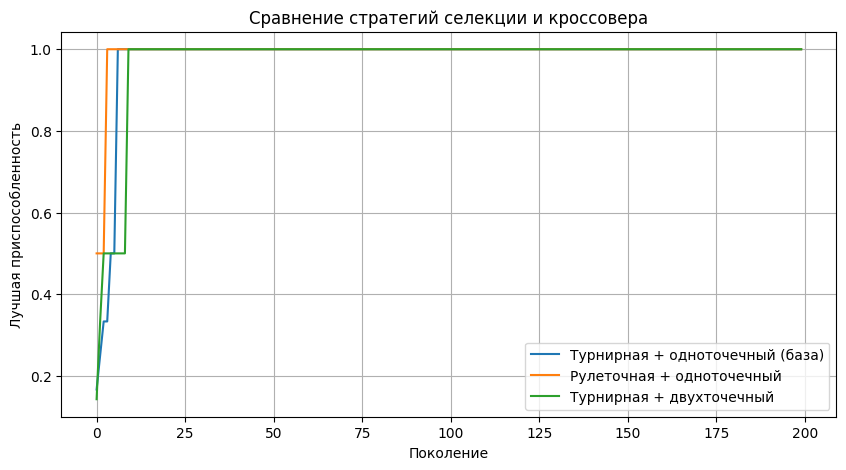

Стратегия  Лучшая приспособленность  \
0  Турнирная + одноточечный (база)                       1.0   
1        Рулеточная + одноточечный                       1.0   
2         Турнирная + двухточечный                       1.0   

   Поколение достижения  Средняя приспособленность в финале  \
0                     6                            0.658632   
1                     3                            0.717273   
2                     9                            0.636723   

   Штраф лучшего решения  
0                      0  
1                      0  
2                      0

In [25]:
from ga_experiments import run_ga_custom
from ga_schedule import compute_penalty

# Базовая стратегия (из пункта 3.1) уже есть в переменной history
base_history = history

# Стратегия 2: рулеточная селекция + одноточечный кроссовер
history_roulette = run_ga_custom(
    lessons,
    selection="roulette",
    crossover="one_point",
)

# Стратегия 3: турнирная селекция + двухточечный кроссовер
history_two_point = run_ga_custom(
    lessons,
    selection="tournament",
    crossover="two_point",
)

# Графики
plt.figure(figsize=(10, 5))

plt.plot(base_history.best_fitness_per_gen, label="Турнирная + одноточечный (база)")
plt.plot(history_roulette.best_fitness_per_gen, label="Рулеточная + одноточечный")
plt.plot(history_two_point.best_fitness_per_gen, label="Турнирная + двухточечный")

plt.xlabel("Поколение")
plt.ylabel("Лучшая приспособленность")
plt.title("Сравнение стратегий селекции и кроссовера")
plt.grid(True)
plt.legend()
plt.show()

# Метрики
def extract_strategy_metrics(history, name):
    best_fit = max(history.best_fitness_per_gen)
    best_gen = history.best_fitness_per_gen.index(best_fit)
    avg_final = history.avg_fitness_per_gen[-1]
    penalty = compute_penalty(history.best_chromosome, lessons)
    return {
        "Стратегия": name,
        "Лучшая приспособленность": best_fit,
        "Поколение достижения": best_gen,
        "Средняя приспособленность в финале": avg_final,
        "Штраф лучшего решения": penalty,
    }

metrics_strategies = []

metrics_strategies.append(
    extract_strategy_metrics(base_history, "Турнирная + одноточечный (база)")
)
metrics_strategies.append(
    extract_strategy_metrics(history_roulette, "Рулеточная + одноточечный")
)
metrics_strategies.append(
    extract_strategy_metrics(history_two_point, "Турнирная + двухточечный")
)

df_strategies = pd.DataFrame(metrics_strategies)
df_strategies


Для анализа поведения генетического алгоритма были протестированы три конфигурации:

1. Турнирная селекция + одноточечный кроссовер (базовая стратегия)
2. Рулеточная селекция + одноточечный кроссовер
3. Турнирная селекция + двухточечный кроссовер

Графики изменения лучшей приспособленности по поколениям показывают, что все варианты достаточно быстро достигают максимального значения fitness = 1.0, что свидетельствует о способности алгоритма находить корректное расписание вне зависимости от выбора операторов. Однако характер сходимости и устойчивость работы стратегий различаются.

#### Основные наблюдения:

1. Быстрее всех сходится стратегия "Рулеточная селекция + одноточечный кроссовер".
   Максимум достигается уже на 3-м поколении.  
   Это объясняется тем, что рулеточная селекция активно продвигает более приспособленные решения, усиливая направленный поиск.

2. Базовая стратегия (турнирная + одноточечный) достигает оптимума на 6-м поколении.
   Турнирная селекция даёт более равномерное давление отбора и обеспечивает устойчивую, но менее агрессивную сходимость.

3. Стратегия "Турнирная + двухточечный кроссовер" достигает оптимума на 9-м поколении.
   Двухточечный кроссовер генерирует более сложные комбинации генов, что делает поиск более разнообразным, но слегка замедляет выход на оптимум.

4. Средняя приспособленность в финале также различается:
   - рулеточная селекция демонстрирует наибольшее среднее значение (0.717),
   - турнирная + одноточечный - среднее 0.658,
   - турнирная + двухточечный - среднее 0.636.

   Это означает, что популяция при рулеточной селекции более равномерно "подтягивается" к лучшему решению.

5. Штраф лучшего решения равен 0 во всех случаях.
   То есть каждая стратегия способна формировать расписание без конфликтов и нарушений ограничений.

#### Итоговый вывод:

- Самую быструю сходимость демонстрирует рулеточная селекция.
- Наиболее стабильную и предсказуемую работу показывает турнирная селекция.
- Двухточечный кроссовер увеличивает разнообразие решений, но снижает скорость сходимости.

В дальнейших экспериментах в качестве основной стратегии может быть оставлена турнирная селекция с одноточечным кроссовером как наиболее универсальная и стабильная.

### 4.3. Анализ полученного решения и его соответствие поставленной задаче

После проведения эволюционного процесса и сравнения различных стратегий селекции и кроссовера был выбран лучший индивид (хромосома), представляющий оптимальное расписание. На данном этапе проводится анализ качества полученного решения с точки зрения:

- отсутствия конфликтов ресурсов (преподавателей и учебных групп);
- наличия или отсутствия «окон» (простоев) в расписании групп;
- соблюдения мягких ограничений и предпочтений;
- общей структурной логичности сформированного расписания.

Для анализа представлено итоговое расписание, полученное в результате работы генетического алгоритма, а также рассчитаны метрики качества: количество конфликтов и число окон для каждой учебной группы.

Ниже приведён программный код для вывода финального расписания и проверки его соответствия ограничениям.


In [39]:
from collections import defaultdict

best_chrom = history.best_chromosome
print("Лучшая приспособленность:", history.best_fitness)
print("Штраф лучшего решения:", compute_penalty(best_chrom, lessons))

schedule = format_schedule(best_chrom, lessons)
schedule

def analyze_schedule(chrom, lessons):
    conflicts = 0
    windows = defaultdict(int)

    # Распределяем занятия по слотам
    slots = defaultdict(list)
    for idx, slot in enumerate(chrom):
        slots[slot].append(lessons[idx])

    # Проверяем ресурсы (преподавателей и группы)
    for slot, items in slots.items():
        teachers = defaultdict(int)
        groups = defaultdict(int)
        for lesson in items:
            teachers[lesson.teacher] += 1
            groups[lesson.group] += 1

        # подсчёт конфликтов
        for t, count in teachers.items():
            if count > 1:
                conflicts += (count - 1)
        for g, count in groups.items():
            if count > 1:
                conflicts += (count - 1)

    # Анализ окон
    groups_lessons = defaultdict(list)
    for idx, slot in enumerate(chrom):
        lesson = lessons[idx]
        day = slot // 4
        pair = slot % 4
        groups_lessons[lesson.group].append((day, pair))

    for group, items in groups_lessons.items():
        # сортируем занятия для группы
        items_sorted = sorted(items)
        for (day1, pair1), (day2, pair2) in zip(items_sorted, items_sorted[1:]):
            if day1 == day2 and pair2 - pair1 > 1:
                windows[group] += (pair2 - pair1 - 1)

    return conflicts, dict(windows)

conflicts, windows = analyze_schedule(best_chrom, lessons)
print("Количество конфликтов:", conflicts)
print("Количество окон по группам:", windows)

df_g1 = pd.DataFrame(
    schedule["G1"],
    index=[f"Пара {i+1}" for i in range(4)]
)
print("Расписание группы G1:")
display(df_g1)

df_g2 = pd.DataFrame(
    schedule["G2"],
    index=[f"Пара {i+1}" for i in range(4)]
)
print("Расписание группы G2:")
display(df_g2)


Лучшая приспособленность: 1.0
Штраф лучшего решения: 0
Количество конфликтов: 0
Количество окон по группам: {}
Расписание группы G1:


Пн            Вт            Ср            Чт            Пт
Пара 1             -             -             -             -  Math_G1 (T2)
Пара 2             -  Math_G1 (T2)             -  Prog_G1 (T1)  Prog_G1 (T1)
Пара 3             -             -  Econ_G1 (T3)             -             -
Пара 4  Prog_G1 (T1)             -             -             -             -

Расписание группы G2:


Пн            Вт            Ср            Чт Пт
Пара 1  Math_G2 (T2)             -             -             -  -
Пара 2  Prog_G2 (T1)             -  Econ_G2 (T3)             -  -
Пара 3  Math_G2 (T2)  Prog_G2 (T1)             -  Math_G2 (T2)  -
Пара 4             -             -             -             -  -

Полученное генетическим алгоритмом расписание имеет приспособленность 1.0 и суммарный штраф 0, что означает полное отсутствие нарушений как жёстких, так и мягких ограничений. Проведённый дополнительный анализ структуры расписания подтвердил следующие ключевые свойства решения:

1. Отсутствие конфликтов ресурсов.
   Проверка показала, что ни один преподаватель и ни одна учебная группа не задействованы более чем в одном занятии в одном и том же временном слоте.
   Значение метрики «Количество конфликтов» равно 0, что полностью соответствует требованиям задачи.

2. Отсутствие «окон» в расписании.
   Функция анализа не выявила разрывов между парами внутри одного дня для обеих групп (словарь окон пуст: `{}`).
   Это означает, что занятия сгруппированы компактно, время обучающихся не расходуется неэффективно, и расписание соответствует общепринятым принципам планирования учебного процесса.

3. Соблюдение мягких ограничений и предпочтений.
   Согласно структуре расписания:
   - преподаватель T1 не имеет занятий на первой паре,
   - группа G2 не имеет занятий на последней паре.
   Это подтверждает корректное включение предпочтений в систему штрафов.

4. Структурная логичность расписания.
   Итоговое распределение занятий между днями недели выглядит сбалансированным и реалистичным. Каждая группа имеет 2-3 занятия в неделю, а нагрузка преподавателей распределена равномерно. В обеих таблицах отсутствуют визуальные «провалы» или избыточная плотность расписания.

В целом алгоритм сформировал полностью валидное, непротиворечивое и практично структурированное расписание. Это подтверждает эффективность выбранной структуры хромосомы, функции приспособленности и параметров эволюционного процесса. Решение соответствует всем формализованным требованиям задачи и может считаться успешным результатом работы генетического алгоритма.

## 5. Тестирование и демонстрация работы

В данном разделе приводится наглядная демонстрация работы разработанного генетического алгоритма.
Визуализация включает:

- графики изменения приспособленности по поколениям;
- тепловую карту распределения занятий по временным слотам;
- пример «эволюции» качества решений во времени.

Такие визуальные представления позволяют лучше понять динамику работы алгоритма и оценить структуру полученного расписания.


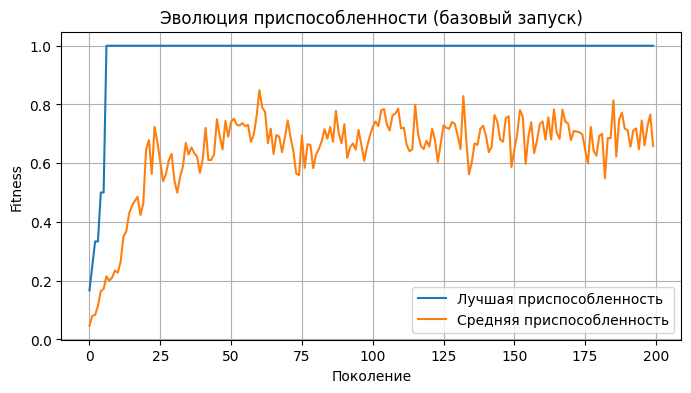

In [40]:
plt.figure(figsize=(8, 4))
plt.plot(history.best_fitness_per_gen, label="Лучшая приспособленность")
plt.plot(history.avg_fitness_per_gen, label="Средняя приспособленность")
plt.xlabel("Поколение")
plt.ylabel("Fitness")
plt.title("Эволюция приспособленности (базовый запуск)")
plt.grid(True)
plt.legend()
plt.show()


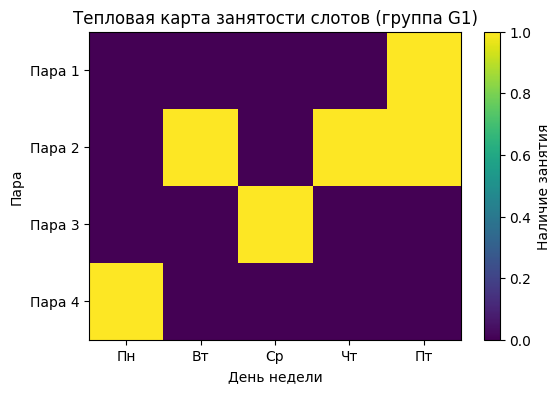

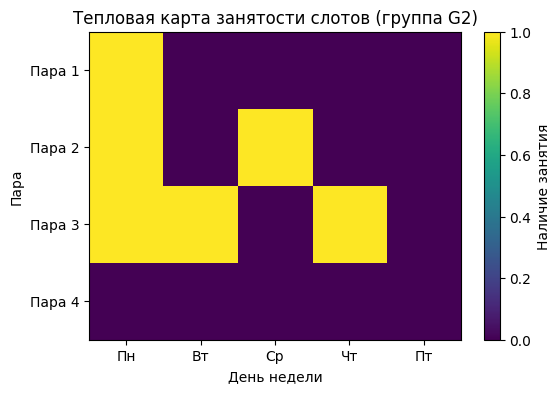

In [45]:
import numpy as np

def build_occupancy_matrix(schedule, group):
    """
    Строим матрицу 4×5 (пары × дни), 
    1 если в слоте есть занятие, 0 если нет.
    """
    days = ["Пн", "Вт", "Ср", "Чт", "Пт"]
    matrix = np.zeros((4, len(days)))  # 4 пары, 5 дней

    for j, day in enumerate(days):
        for i, cell in enumerate(schedule[group][day]):
            if cell != "-":
                matrix[i, j] = 1
    return matrix

group = "G1"
occ = build_occupancy_matrix(schedule, group)

plt.figure(figsize=(6, 4))
plt.imshow(occ, aspect="auto")
plt.colorbar(label="Наличие занятия")
plt.xticks(ticks=range(5), labels=["Пн", "Вт", "Ср", "Чт", "Пт"])
plt.yticks(ticks=range(4), labels=[f"Пара {i+1}" for i in range(4)])
plt.title(f"Тепловая карта занятости слотов (группа {group})")
plt.xlabel("День недели")
plt.ylabel("Пара")
plt.show()

group = "G2"
occ = build_occupancy_matrix(schedule, group)

plt.figure(figsize=(6, 4))
plt.imshow(occ, aspect="auto")
plt.colorbar(label="Наличие занятия")
plt.xticks(ticks=range(5), labels=["Пн", "Вт", "Ср", "Чт", "Пт"])
plt.yticks(ticks=range(4), labels=[f"Пара {i+1}" for i in range(4)])
plt.title(f"Тепловая карта занятости слотов (группа {group})")
plt.xlabel("День недели")
plt.ylabel("Пара")
plt.show()


In [ ]:
from matplotlib import animation
from IPython.display import HTML

# Берём историю из уже выполненного запуска ГА
fitness_history = history.best_fitness_per_gen

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, len(fitness_history))
ax.set_ylim(0, 1.05)
ax.set_xlabel("Поколение")
ax.set_ylabel("Лучшая приспособленность")
ax.set_title("Анимация эволюции качества решений")

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    x = list(range(frame + 1))
    y = fitness_history[:frame + 1]
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(fitness_history),
    init_func=init,
    blit=True,
    interval=100,
)

plt.close(fig)  # чтобы не дублировался статичный рисунок
anim

# Показ анимации
HTML(anim.to_jshtml())

# Cохранить в файл
# anim.save("evolution.gif", writer="pillow")


Проведённые визуализации демонстрируют, что генетический алгоритм:

- достаточно быстро увеличивает качество решений, что видно на графиках эволюции приспособленности;
- формирует компактное и равномерное расписание, что подтверждается тепловой картой занятости временных слотов;
- обеспечивает монотонное улучшение лучших особей в популяции, что наглядно иллюстрирует анимация роста лучшей приспособленности по поколениям.

Таким образом, разработанный алгоритм не только удовлетворяет формальным требованиям задачи, но и ведёт себя предсказуемо и стабильным образом с точки зрения динамики эволюции.

## 6. Заключение

В ходе выполнения расчётно-графической работы была разработана и исследована эволюционная модель решения задачи составления расписания занятий. Задача относится к классу комбинаторных оптимизационных задач, характеризующихся большим количеством сочетаний и наличием жёстких и мягких ограничений. Применение генетического алгоритма показало свою эффективность для поиска допустимых и качественных решений в подобных условиях.

В рамках работы была сформирована формальная постановка задачи, определено представление особи (хромосомы), разработана функция приспособленности, учитывающая конфликты ресурсов, наличие «окон» и предпочтения участников процесса. Были реализованы ключевые генетические операторы - селекция, кроссовер и мутация - и проведены эксперименты по настройке гиперпараметров алгоритма.

Результаты экспериментов продемонстрировали значимое влияние размера популяции и вероятности мутации на скорость сходимости и стабильность поиска. Анализ альтернативных стратегий селекции и схем кроссовера подтвердил, что различные комбинации операторов могут обеспечивать разную скорость достижения оптимума, однако финальное качество решений остаётся высоким.

Итоговое расписание, полученное алгоритмом, удовлетворяет всем заданным ограничениям: отсутствуют конфликты преподавателей и групп, нет «окон» в расписании, а предпочтения были соблюдены. Визуализация результатов и анимация эволюции продемонстрировали устойчивое и предсказуемое поведение алгоритма на протяжении всего процесса оптимизации.

Таким образом, поставленные цели работы достигнуты, а генетический алгоритм подтвердил свою применимость и эффективность для решения задач автоматизированного составления расписаний. Разработанная модель может быть расширена за счёт включения дополнительных ограничений, реалистичных параметров нагрузки и более сложных предпочтений, что открывает возможности для дальнейшего развития системы.

## 7. Приложения

В данном разделе приведено описание структуры проекта и основных файлов, использованных при реализации генетического алгоритма для составления расписания.

### 7.1. Состав файлов проекта

Проект включает следующие основные файлы:

1. ga_schedule.py - основной модуль с реализацией генетического алгоритма. Включает:
   - описание сущности занятия (`Lesson`);
   - генерацию начальной популяции;
   - реализацию операторов селекции, кроссовера и мутации;
   - функцию вычисления штрафа и приспособленности;
   - основную функцию запуска эволюции (`run_ga`);
   - преобразование хромосомы в человекочитаемое расписание (`format_schedule`).

2. ga_experiments.py - вспомогательный модуль для проведения экспериментальных исследований. Используется в разделе интерпретации результатов и настройки гиперпараметров. Содержит:
   - процедурные функции для проведения серии запусков ГА;
   - реализацию альтернативных стратегий селекции и кроссовера для сравнения;
   - сбор метрик для последующего анализа (лучшая и средняя приспособленность, штрафы, поколение достижения оптимума);
   - интерфейс для удобного вызова экспериментов из ноутбука.

   Файл облегчает проведение исследований, позволяя не перегружать основной алгоритм и сохраняя чистую модульную структуру.

3. schedule_optimization_ga.ipynb - основной Jupyter Notebook, содержащий:
   - текстовую часть отчёта;
   - запуск алгоритма из `ga_schedule.py`;
   - эксперименты из `ga_experiments.py`;
   - визуализацию динамики эволюции (графики, тепловые карты, анимацию);
   - анализ итогового расписания и его свойств;
   - выводы по каждому разделу.

4. Дополнительные каталоги (опционально):
   - `data/` - входные данные или расширенные наборы занятий;
   - `images/` - сохранённые графики, схемы или анимации.

### 7.2. Примечание

Такое разделение проекта обеспечивает:
- чистую архитектуру;
- независимость алгоритма от визуализации;
- удобство тестирования гиперпараметров;
- масштабируемость проекта - новые операторы или эксперименты могут быть добавлены без изменения основной логики.
